<img src= "https://digital.hbs.edu/platform-digit/wp-content/uploads/sites/2/2019/10/airbnb-678x381.png">

<h2>What is Airbnb?</h2>
<h>Airbnb was founded in 2008 as a platform enabling locals to list their homes for short term rental and travelers to have a lodging option alternative to hotels. Today, it is a 2.6 billion dollar travel empire (Business Insider 2018) and the largest provider of rooms available to travelers (Airbnb: 3M, three times as much as Mariott’s 1M) (Str 2019). Along with homes for rent, Airbnb.com allows its users to search through “Experiences”, which include pre-arranged multi destination trips, “Restaurants,” and recently even “Animals,” which stands for experiences where travelers can meet and interact with animals local to their travel destination (e.g., Zoo visit). </h>

 <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">TABLE OF CONTENTS📝</div>
    
* [1. OBJECTIVES OF NOTEBOOK](#1)
    
* [2. IMPORTING LIBRARIES](#2)
    
* [3. LOADING DATA SET](#3)
    
* [4. DATA CLEANING & EXPLORATORY](#4)
    
* [5. DATA VISUALIZATION & ANALYSIS WITH GROUPBY](#5)
      

<a id="2"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">IMPORTING LIBRARIES📚</div>

In [1]:

# 1.0 Call libraries
# 1.1 For data manipulations
import numpy as np
import pandas as pd
from numpy.random import default_rng

# 1.2 For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl     # For creating colormaps

# 1.3 For data processing
from sklearn.preprocessing import StandardScaler

# 1.4 OS related
import os

# 1.5 Misc facilities
from collections import Counter
import time, sys, gc

In [2]:
#1.6 From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


<a id="3"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Loading Data set👓</div>

In [3]:
# Reading the csv file
data=pd.read_csv('../input/airbnbopendata/Airbnb_Open_Data.csv',low_memory=False)

<a id="4"></a>
### <div style="text-align: left; background-color: #BB4ED8 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">DATA EXPLORATORY & CLEANING⚒</div>

In [4]:
##Displaying the data types
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [5]:
## Displaying the columns names
data.columns

##Displaying the table data
data.head()


Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
##Displaying descriptive statistics of DataFrame
data.describe()


,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
##Displaying summary of DataFrame
data.info

<bound method DataFrame.info of              id                                              NAME  \
0       1001254                Clean & quiet apt home by the park   
1       1002102                             Skylit Midtown Castle   
2       1002403               THE VILLAGE OF HARLEM....NEW YORK !   
3       1002755                                               NaN   
4       1003689  Entire Apt: Spacious Studio/Loft by central park   
...         ...                                               ...   
102594  6092437                        Spare room in Williamsburg   
102595  6092990                     Best Location near Columbia U   
102596  6093542                    Comfy, bright room in Brooklyn   
102597  6094094                  Big Studio-One Stop from Midtown   
102598  6094647                              585 sf Luxury Studio   

            host id host_identity_verified    host name neighbourhood group  \
0       80014485718            unconfirmed     Madaline     

In [8]:
##Calculating dimensions of DataFrame
data.shape

(102599, 26)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Removing $ from Price columns:</b>


In [9]:
## Removing $ from service Fee column
#data['service fee']=data['service fee'].str.replace('$','');
data['service fee'] = data['service fee'].str.replace(r'\D','',regex=True)
## Removing $ from service Fee column
data['price'] = data['price'].str.replace(r'\D','',regex=True)
data['price'] = data['price'].str.strip()
#data['price']=data['price'].str.replace('$','');
#data['price'] = data['price'].apply(lambda x: type(x).__name__)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Checking Duplicates:</b>


In [10]:
dp=data.duplicated()
dp.value_counts()

False    102058
True        541
dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Removing Duplicates:</b>


In [11]:
#2.0.0 check total row count, before drop duplicates
rows=data.shape[0] 
cols=data.shape[1]
print("Rows: " + str(rows))
print("Columns: " + str(cols))
#2.0.1 drop duplicates
data.drop_duplicates()

Rows: 102599
Columns: 26


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,57365208,Cozy bright room near Prospect Park,77326652202,unconfirmed,Mariam,Brooklyn,Flatbush,40.64945,-73.96108,United States,...,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...,NaN
102054,57365760,Private Bedroom with Amazing Rooftop View,45936254757,verified,Trey,Brooklyn,Bushwick,40.69872,-73.92718,United States,...,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?,NaN
102055,57366313,Pretty Brooklyn One-Bedroom for 2 to 4 people,23801060917,verified,Michael,Brooklyn,Bedford-Stuyvesant,40.67810,-73.90822,United States,...,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...,NaN
102056,57366865,Room & private bathroom in historic Harlem,15593031571,unconfirmed,Shireen,Manhattan,Harlem,40.81248,-73.94317,United States,...,NaN,2.0,0.0,NaN,NaN,1.0,1.0,0.0,Each of us is working and/or going to school a...,NaN


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Checking NaN & Null in DataSet:</b>


In [12]:
#2.0.2 check null
dn=data.isnull().sum().sort_values()

#2.0.3 Check NaN
data.isna().sum().sort_values()


id                                     0
room type                              0
host id                                0
long                                   8
lat                                    8
neighbourhood                         16
neighbourhood group                   29
cancellation_policy                   76
instant_bookable                     105
country code                         131
number of reviews                    183
Construction year                    214
price                                247
NAME                                 250
service fee                          273
host_identity_verified               289
calculated host listings count       319
review rate number                   326
host name                            406
minimum nights                       409
availability 365                     448
country                              532
reviews per month                  15879
last review                        15893
house_rules     

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Removing NaN & Null from dataset.</b>


In [13]:
#2.0.3 update NA with 0
data.fillna(0, inplace=True)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Data type Transformation:</b>
    <ul>
      <li> <mark><b>Mapping Column dtype to New dtype</li>
      <li> <mark><b>Transforming into dtypes</li>


In [14]:
#2.0.4 Mapping coulmns with dtype
convert_dict = {'Construction year': int, 'price': int,
       'service fee': int, 'minimum nights': int, 'review rate number': int,
       'availability 365': int}

#2.0.5 Transforming dtypes
data=data.astype(convert_dict)
data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                   int64
price                               int64
service fee                         int64
minimum nights                      int64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                  int64
calculated host listings count    float64
availability 365                  

<div style="text-align: left; background-color:#F19F9F; font-family: Trebuchet MS; color:#494545; padding: 20px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px">Analysis market data using Groupby:  </div>
    <ul>
      <li> <mark><b>Process raw data step by step</li>
      <li> <mark><b>Data visualization</li>


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Understanding on groupby:</b>

<h></h>

Refer Tutorial [Click here]( https://www.geeksforgeeks.org/pandas-groupby/?ref=lbp)


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Solving Airbnb data Problems:</b>

---
1.  How does proce varies for each neighbourhood group?
2.  How many bookings per year does average place have according to neighborhood ?
3. How does the minimum stay effect the service fee ?
4. How does the room type effect the price ?
5. Does the cancelation policy effect the price ?
6. Does the ability to instantly book affect the price ?




<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>1. How does price varies for each neighbourhood group?</b>

In [15]:
##3.0.0 Grouping 
grp1=data['price'].groupby(data['neighbourhood group']).sum().sort_values(ascending=False)

##3.0.1 show filtered data
grp1.head()

neighbourhood group
Manhattan        27189434
Brooklyn         26158345
Queens            8340168
Bronx             1698108
Staten Island      594515
Name: price, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>1. Bar Plotting:</b>


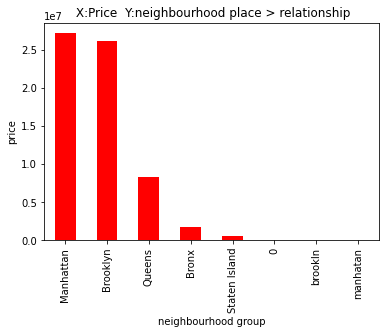

In [16]:
##3.0.2 bar plotting
grp1.plot.bar(ylabel='price', title=" X:Price  Y:neighbourhood place > relationship", color='red');

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>2. How many bookings per year does average place have according to neighborhood?</b>

In [17]:
#2.0.0 renaming the column
data.rename(columns={'availability 365':'Days_booked'},inplace=True)  

#2.0.1 checking Days_booked  
df=data['Days_booked']

#2.0.2 Group by neighborhood with mean
grp2=data.groupby(['neighbourhood group']).mean()
grp2['Days_booked'].sort_values(ascending=False)

neighbourhood group
manhatan         325.000000
Staten Island    197.063874
Bronx            177.983776
Queens           161.058265
Manhattan        141.540327
Brooklyn         129.222886
0                124.310345
brookln           47.000000
Name: Days_booked, dtype: float64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>2. Pie Chart:</b>


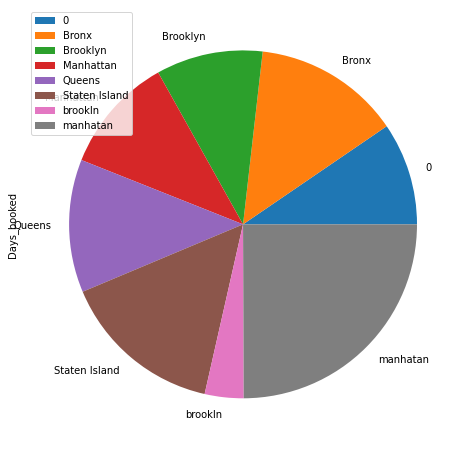

In [18]:
#2.0.3 Di
grp2.plot.pie(y='Days_booked', figsize=(8,8));

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>3. How does the minimum stay effect the service fee?</b>


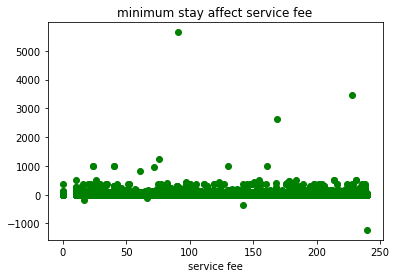

In [19]:
#3.0.0 
plt.scatter(x=data['service fee'], y=data['minimum nights'], c='green');
plt.title("minimum stay affect service fee");
plt.xlabel("service fee");


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>4. How does the room type effect the price?</b>


In [20]:
#4.0.0
grp4=data.groupby(data['room type']).sum()
grp4['price'].sort_values(ascending=False)

room type
Entire home/apt    33484405
Private room       29031592
Shared room         1406505
Hotel room            77542
Name: price, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>4. Pie Plotting:</b>


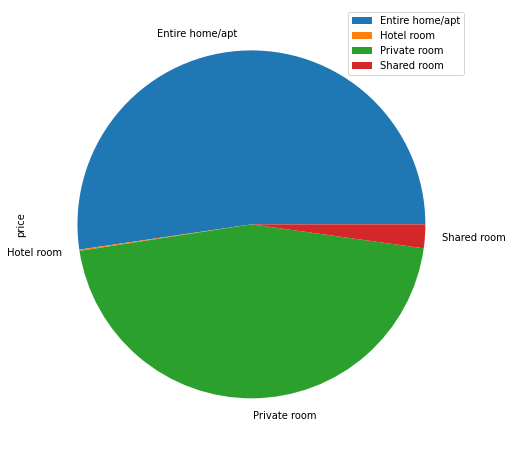

In [21]:
grp4.plot.pie(y='price', figsize=(8,8));

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>5. Does the cancelation policy effect the price ?</b>

In [22]:
#5.0.0 Grouping by catagorical column 
grp5=data.groupby(data['cancellation_policy']).sum()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>5. Bar Plotting:</b>


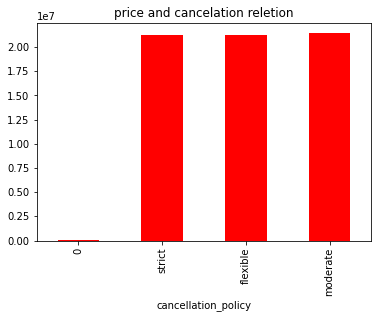

In [23]:
#5.0.1
grp5['price'].sort_values(ascending=True).plot.bar(y='price', title="price and cancelation reletion", color='r');

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>5. Pie Plotting:</b>


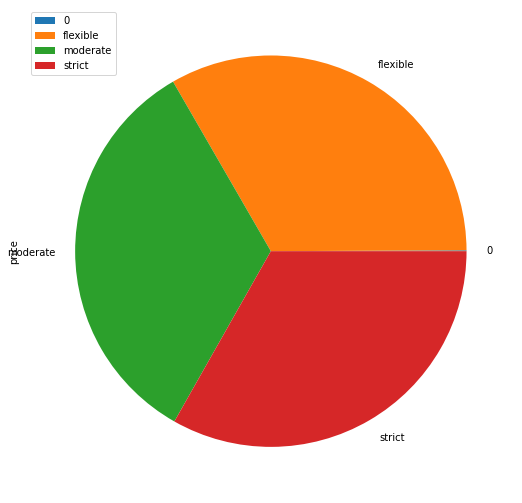

In [24]:
grp5.plot.pie(y='price', figsize=(9,9));

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Value_counts & plotting:</b>

<h></h>

Refer Tutorial [Click here](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

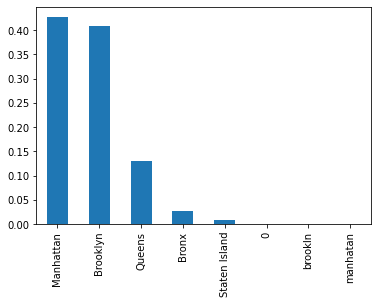

In [25]:
## Return of neighbourhood group's unique values
data['neighbourhood'].value_counts() ##Default Descending order

## value_counts with parameter 
ng=data['neighbourhood group'].value_counts(normalize=True) 
##Plotting of neighbourhood group
ng.plot(kind='bar');


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Unique data & Reletionsa:</b>

<h></h>

Refer Tutorial [Click here]( https://www.geeksforgeeks.org/python-pandas-series-unique/)


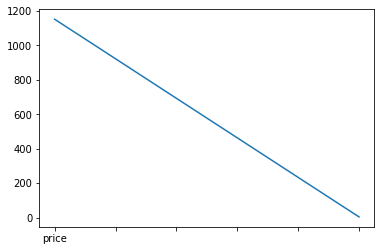

In [26]:
## Showing the room type
bd=data[['price','room type']].nunique()

## Plotting
bd.plot(kind='line');

### <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">     👉 Comparing reletions among price, neighbourhood group, room type etc </div>

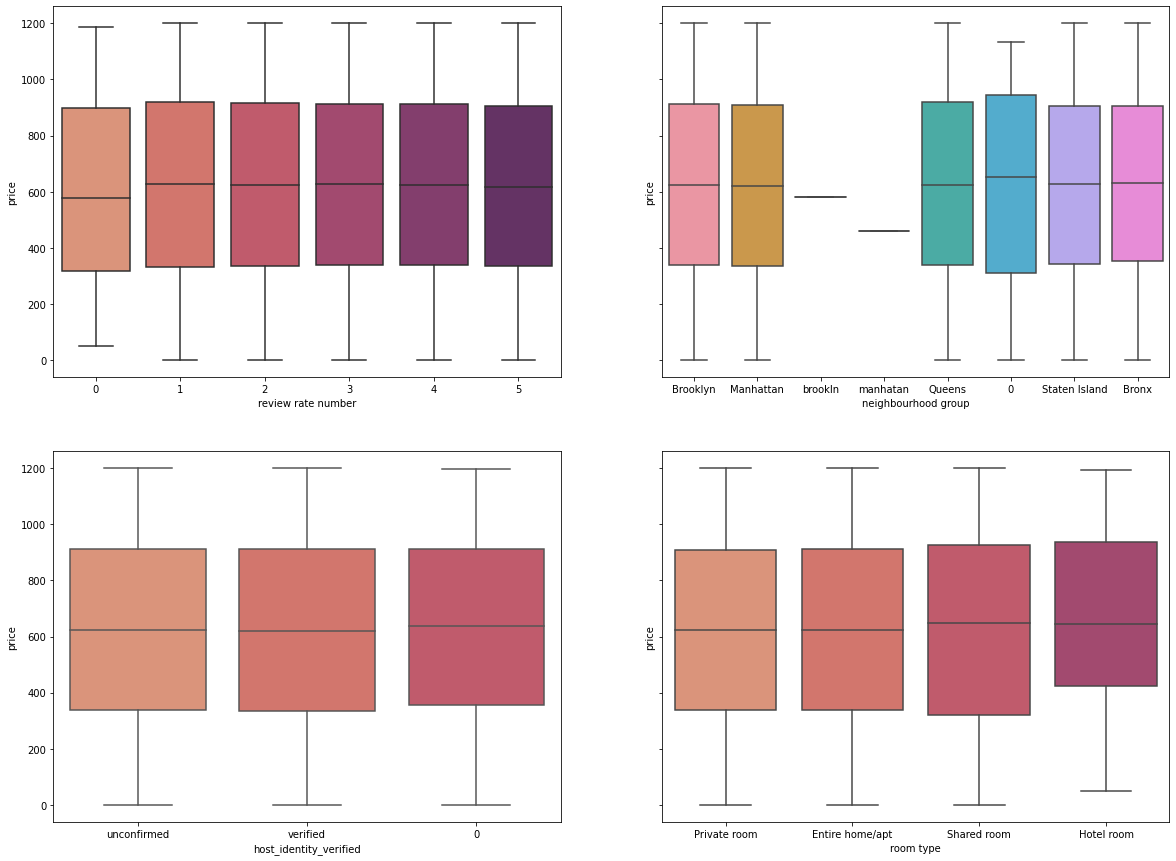

In [27]:
ig, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(20,15))

sns.set_palette("flare")

tmp_airbnb = data.copy()
data['review rate number'] = data['review rate number'].astype("category")

sns.boxplot(x='review rate number', y='price', data=tmp_airbnb, ax=ax[0,0]);
sns.boxplot(x='neighbourhood group', y='price', data=tmp_airbnb, ax=ax[0,1]);
sns.boxplot(x='host_identity_verified', y='price', data=tmp_airbnb, ax=ax[1,0]);
sns.boxplot(x='room type', y='price', data=tmp_airbnb, ax=ax[1,1]);


<div style="border-radius:10px;
            border :#0A0104 solid;
            padding: 15px;
            background-color:#FFF0F5 ;
           font-size:110%;
            text-align: left">
<p style="font-family:newtimeroman;font-size:130%;text-align:center;border-radius:20px 20px;"> If you liked this Notebook, please do upvote.<br> If you have any questions, feel free to comment!<br> ✨Best Wishes✨</p>

![https://jessieslegacy.com/wp-content/uploads/2014/01/thankyou_ikit.png](https://jessieslegacy.com/wp-content/uploads/2014/01/thankyou_ikit.png)